In [40]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100,1)
y = (X>0.5).astype(float)

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z*(1-z)

In [42]:
class NN:
    def __init__(self):
        self.W1 = np.random.randn(1, 4) * 0.01
        self.b1 = np.zeros((1, 4))
        self.W2 = np.random.randn(4, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def forward(self, x):
        self.z1 = x.dot(self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y):
        m = len(x)
        dloss_da2 = -(y/self.a2 + -(1-y)/(1-self.a2))
        da2_dz2 = sigmoid_derivative(self.a2)

        dZ2 = dloss_da2 * da2_dz2
        dW2 = self.a1.T.dot(dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = dZ2.dot(self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = x.T.dot(dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def predict(self, x):
        return (self.forward(x) > 0.5).astype(int)
        
        

In [43]:
def train(optimizer, name):
    model = NN()
    lr = 0.01
    epochs = 2000

    # Momentum variables (for momentum/Adam)
    vW1 = vW2 = vb1 = vb2 = 0
    mW1 = mW2 = mb1 = mb2 = 0   # Adam
    loss_curve = []

    beta1, beta2 = 0.9, 0.999
    eps = 1e-8

    for epoch in range(epochs):

        # Forward + Backward
        y_pred = model.forward(X)
        loss = -(y*np.log(y_pred + eps) + (1-y)*np.log(1-y_pred + eps)).mean()
        dW1, db1, dW2, db2 = model.backward(X, y)

        # ---------------- OPTIMIZER RULES ----------------
        if name == "SGD":
            model.W1 -= lr * dW1
            model.b1 -= lr * db1
            model.W2 -= lr * dW2
            model.b2 -= lr * db2

        elif name == "Momentum":
            vW1 = 0.9 * vW1 + lr * dW1
            vW2 = 0.9 * vW2 + lr * dW2
            vb1 = 0.9 * vb1 + lr * db1
            vb2 = 0.9 * vb2 + lr * db2

            model.W1 -= vW1
            model.b1 -= vb1
            model.W2 -= vW2
            model.b2 -= vb2

        elif name == "Adam":
            # Momentum
            mW1 = beta1*mW1 + (1-beta1)*dW1
            mW2 = beta1*mW2 + (1-beta1)*dW2
            mb1 = beta1*mb1 + (1-beta1)*db1
            mb2 = beta1*mb2 + (1-beta1)*db2
            
            # RMSProp
            vW1 = beta2*vW1 + (1-beta2)*(dW1**2)
            vW2 = beta2*vW2 + (1-beta2)*(dW2**2)
            vb1 = beta2*vb1 + (1-beta2)*(db1**2)
            vb2 = beta2*vb2 + (1-beta2)*(db2**2)

            # Bias correction
            mW1_hat = mW1/(1-beta1**(epoch+1))
            mW2_hat = mW2/(1-beta1**(epoch+1))
            mb1_hat = mb1/(1-beta1**(epoch+1))
            mb2_hat = mb2/(1-beta1**(epoch+1))

            vW1_hat = vW1/(1-beta2**(epoch+1))
            vW2_hat = vW2/(1-beta2**(epoch+1))
            vb1_hat = vb1/(1-beta2**(epoch+1))
            vb2_hat = vb2/(1-beta2**(epoch+1))

            model.W1 -= lr * mW1_hat / (np.sqrt(vW1_hat)+eps)
            model.W2 -= lr * mW2_hat / (np.sqrt(vW2_hat)+eps)
            model.b1 -= lr * mb1_hat / (np.sqrt(vb1_hat)+eps)
            model.b2 -= lr * mb2_hat / (np.sqrt(vb2_hat)+eps)

        # -------------------------------------------------

        loss_curve.append(loss)

    accuracy = (model.predict(X) == y).mean()
    return loss_curve, accuracy

In [44]:
sgd_curve, acc_sgd = train("SGD", "SGD")
momentum_curve, acc_mom = train("Momentum", "Momentum")
adam_curve, acc_adam = train("Adam", "Adam")

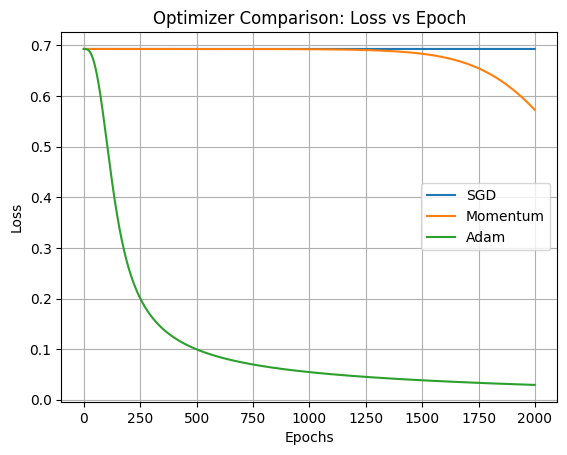


Final Accuracy:
SGD:       0.500
Momentum:  0.970
Adam:      0.990


In [45]:
plt.plot(sgd_curve, label="SGD")
plt.plot(momentum_curve, label="Momentum")
plt.plot(adam_curve, label="Adam")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimizer Comparison: Loss vs Epoch")
plt.legend()
plt.grid()
plt.show()

print("\nFinal Accuracy:")
print(f"SGD:       {acc_sgd:.3f}")
print(f"Momentum:  {acc_mom:.3f}")
print(f"Adam:      {acc_adam:.3f}")